In [484]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [485]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

1. 학습, 검증 데이터 분리
2. 의사결정트리로 모델링
3. 최적의 하이퍼파라미터 찾기
4. 최적의 하이퍼파라미터로 모델링 및 점수내기

In [487]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [488]:
# 1. 학습, 검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=32)

In [489]:
# 2. 의사결정트리로 모델링
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [490]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f'의사결정트리 정확도: {accuracy:.4f}')
print('하이퍼 파라미터 : ', dt_clf.get_params())

의사결정트리 정확도: 0.9444
하이퍼 파라미터 :  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


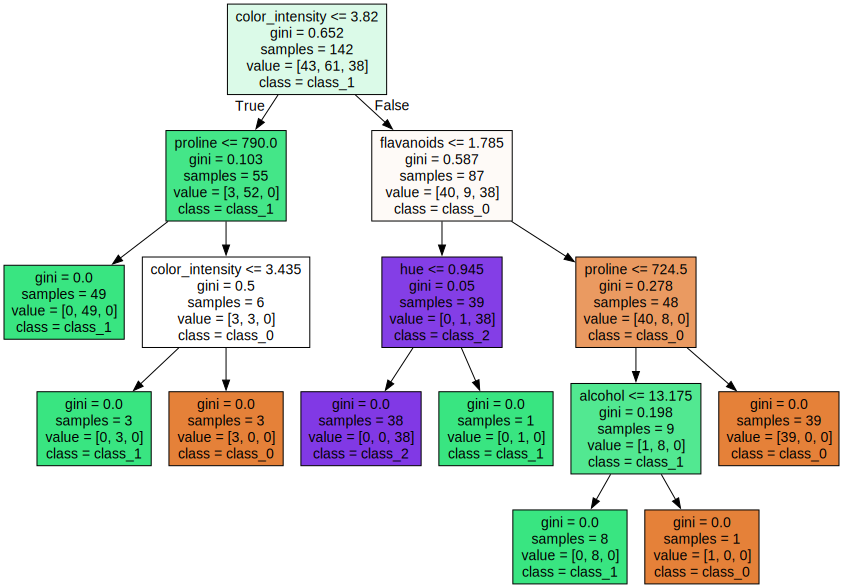

In [491]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, out_file='wine_base.dot', class_names=wine.target_names, feature_names=wine.feature_names, impurity=True, filled=True)
graphviz.Source.from_file('wine_base.dot')

In [531]:
# 3. 최적의 하이퍼파라미터 찾기
def getBestParams(max_depth_list, min_samples_leaf_list, min_samples_split_list):
    params = {
        'max_depth': max_depth_list,
        'min_samples_leaf': min_samples_leaf_list,
        'min_samples_split': min_samples_split_list
    }
    max_score = 0
    best_params = {}
    best_random_state = 0
    for i in range(3, 43, 2):
        dt_clf_temp = DecisionTreeClassifier(max_depth=i)
        grid_cv = GridSearchCV(dt_clf_temp, param_grid=params, scoring='accuracy', cv=5, verbose=1)
        grid_cv.fit(X_train, y_train)
        if max_score < grid_cv.best_score_:
            max_score = grid_cv.best_score_
            best_params = grid_cv.best_params_
            best_random_state = i
        
    print('Best Score :', max_score)
    print('Best Hyper Parameter :', best_params)
    print('Best Random State :', best_random_state)

In [493]:
max_depth_list = range(3, 33, 10)
min_samples_leaf_list = range(2, 12, 3)
min_samples_split_list = range(2, 18, 3)
getBestParams(max_depth_list, min_samples_leaf_list, min_samples_split_list)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Best Score : 0.9009852216748768
Best Hyper Parameter : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [494]:
max_depth_list = range(3, 19, 5)
min_samples_leaf_list = range(2, 9, 2)
min_samples_split_list = range(2, 15, 2)
getBestParams(max_depth_list, min_samples_leaf_list, min_samples_split_list)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
Best Score : 0.9007389162561577
Best Hyper Parameter : {'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2}


In [495]:
max_depth_list = range(3, 9, 2)
min_samples_leaf_list = range(4, 9, 3)
min_samples_split_list = range(2, 7, 2)
getBestParams(max_depth_list, min_samples_leaf_list, min_samples_split_list)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Score : 0.9007389162561577
Best Hyper Parameter : {'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2}


In [514]:
max_depth_list = range(2, 6, 1)
min_samples_leaf_list = range(4, 9, 1)
min_samples_split_list = range(2, 5, 1)
getBestParams(max_depth_list, min_samples_leaf_list, min_samples_split_list)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 

In [532]:
max_depth_list = range(1, 8, 1)
min_samples_leaf_list = range(2, 13, 1)
min_samples_split_list = range(2, 8, 1)
getBestParams(max_depth_list, min_samples_leaf_list, min_samples_split_list)

Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Fitting 5 folds for each of 462 candidat

In [538]:
# 4. 최적의 하이퍼파라미터로 모델링 및 점수내기
dt_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, min_samples_split=3, random_state=4)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(f'의사결정트리 정확도: {accuracy:.4f}')
print('하이퍼 파라미터 : ', dt_clf.get_params())

의사결정트리 정확도: 0.9444
하이퍼 파라미터 :  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 8, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 4, 'splitter': 'best'}


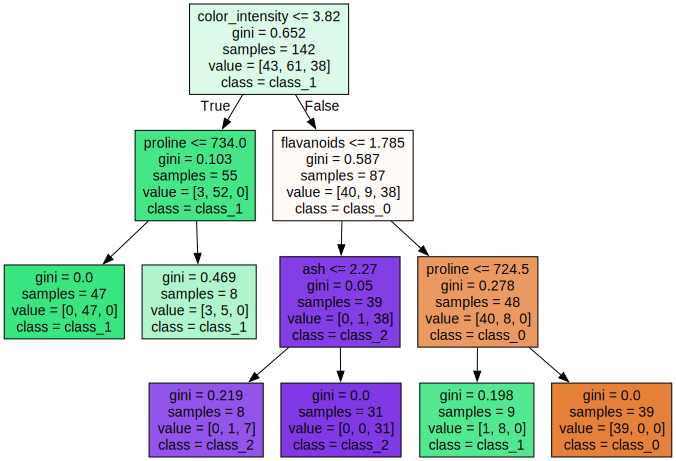

In [539]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, out_file='wine.dot', class_names=wine.target_names, feature_names=wine.feature_names, impurity=True, filled=True)
graphviz.Source.from_file('wine.dot')